In [94]:
import numpy as np 
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
import pylab as pl
from matplotlib.colors import ListedColormap

In [145]:
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score,auc,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV,cross_val_score

# import function to perform feature selection
from sklearn.feature_selection import RFE


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


from sklearn.tree import DecisionTreeClassifier,export_graphviz

from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

In [10]:
features=pd.read_csv('final_dataset.csv',index_col=0)
features.head()

retail_price  discounted_price  is_FK_Advantage_product         brand  \
0         999.0             379.0                        0        Alisha   
1       32157.0           22646.0                        0  FabHomeDecor   
2         999.0             499.0                        0            AW   
3         699.0             267.0                        0        Alisha   
4         220.0             210.0                        0        Sicons   

   Month  Year Product_Category  discount_percentage  
0  March  2016         Clothing            62.062062  
1  March  2016        Furniture            29.576764  
2  March  2016         Footwear            50.050050  
3  March  2016         Clothing            61.802575  
4  March  2016     Pet Supplies             4.545455

In [11]:
features.dtypes

retail_price               float64
discounted_price           float64
is_FK_Advantage_product      int64
brand                       object
Month                       object
Year                         int64
Product_Category            object
discount_percentage        float64
dtype: object

### Performing Two sample independent T test on Retail price column to determine its significance

In [80]:
# Two sample independent T test 
ttest_ind(features['retail_price'],features['is_FK_Advantage_product'])

Ttest_indResult(statistic=46.646199763257286, pvalue=0.0)

In [ ]:
# Ho : The average retail Price of No_advantage Category = The average retail Price of advantage Category (No effect)
# Ha : The average retail Price of No_advantage Category != The average retail Price of advantage Category( effect)
# It is observed that, the pvalue is 0.0 which is less than 0.05 significance level, hence Ho is rejected and Ha is selected 
# there is significant effect of retail Price column on target variable , hence considering the  Retail Price column for analysis

### Performing Two sample independent T test on Retail price column to determine its significance

In [81]:
# Two sample independent T test 
ttest_ind(features['retail_price'],features['is_FK_Advantage_product'])

Ttest_indResult(statistic=46.646199763257286, pvalue=0.0)

In [ ]:
# Ho : The average Discounted Price of No_advantage Category = The average Discounted Price of advantage Category (No effect)
# Ha : The average Discounted Price of No_advantage Category != The average Discounted Price of advantage Category( effect)
# It is observed that, the pvalue is 0.0 which is less than 0.05 significance level, hence Ho is rejected and Ha is selected 
# there is significant effect of Discounted Price column on target variable , hence considering the  Discounted Price column for analysis

### Performing Two sample independent T test on Month column to determine its significance

In [12]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [13]:
features.Month.unique()

array(['March', 'January', 'May', 'June', 'April', 'December', 'February'],
      dtype=object)

In [14]:
features.replace({'January':1,'March':3,'May':5,'June':6,'April':4,'December':12,'February':2},inplace=True)

In [15]:
features.Month.unique()

array([ 3,  1,  5,  6,  4, 12,  2], dtype=int64)

In [16]:
# Two sample independent T test 
ttest_ind(features['Month'],features['is_FK_Advantage_product'])

Ttest_indResult(statistic=213.89756936942086, pvalue=0.0)

In [17]:
# Ho : categorical columns are independent (No effect)
# Ha : Categorical columns are dependent( effect)
# It is observed that, the pvalue is 0.0 which is less than 0.05 significance level, hence Ho is rejected and Ha is selected 
# there is significant effect of Month column on target variable , hence considering the Year column for analysis

### Performing Two sample independent T test on Year column to determine its significance

In [18]:
# Two sample independent T test 
ttest_ind(features['Year'],features['is_FK_Advantage_product'])

Ttest_indResult(statistic=530906.0245021164, pvalue=0.0)

In [19]:
# Ho : categorical columns are independent (No effect)
# Ha : Categorical columns are dependent( effect)
# It is observed that, the pvalue is 0.0 which is less than 0.05 significance level, hence Ho is rejected and Ha is selected 
# there is significant effect of Year column on target variable , hence considering the Month column for analysis

### Performing Chisquare contengency test on Brand column to determine its significance

In [20]:
# cross tabulation
obs=pd.crosstab(features['is_FK_Advantage_product'],features['brand'])
obs

brand                    109F  109f  11e  1OAK  2  20Dresses  22nd  24  3  \
is_FK_Advantage_product                                                     
0                           1     0    1     2  1          1     1   1  0   
1                           0     1    0     0  0          0     0   0  1   

brand                    3D Mat  ...  wallskart  womaniya  www.thepaper.asia  \
is_FK_Advantage_product          ...                                           
0                             1  ...          2         1                  9   
1                             0  ...          0         0                  0   

brand                    xpert  xy decor  youniqueshop  zDelhi.com  zaidis  \
is_FK_Advantage_product                                                      
0                            1         1             1           1       1   
1                            0         0             0           0       0   

brand                    zasmina   Tarkan  
is_FK_Advantage_product                    
0                              2        1  
1                              0        0  

[2 rows x 4801 columns]

In [21]:
stats.chi2_contingency(obs)

(10857.321825838919,
 0.0,
 4800,
 array([[0.96141673, 0.96141673, 0.96141673, ..., 0.96141673, 1.92283346,
         0.96141673],
        [0.03858327, 0.03858327, 0.03858327, ..., 0.03858327, 0.07716654,
         0.03858327]]))

In [22]:
# Ho : categorical columns are independent (No effect)
# Ha : Categorical columns are dependent( effect)
# It is observed that, the pvalue is 0.0 which is less than 0.05 significance level, hence Ho is rejected and Ha is selected 
# there is significant effect of Brand column on target variable , hence considering the Brand column for analysis

### Performing Chisquare contengency test on Product_Category column to determine its significance

In [23]:
# cross tabulation
obs=pd.crosstab(features['is_FK_Advantage_product'],features['Product_Category'])
obs

Product_Category         Automation & Robotics  Automotive  Baby Care  \
is_FK_Advantage_product                                                 
0                                            1        1008        477   
1                                            0           2          4   

Product_Category         Bags, Wallets & Belts  Beauty and Personal Care  \
is_FK_Advantage_product                                                    
0                                          257                       700   
1                                            7                         8   

Product_Category         Cameras & Accessories  Clothing  Computers  Eyewear  \
is_FK_Advantage_product                                                        
0                                           71      5829        524       10   
1                                            1       338         49        0   

Product_Category         Food & Nutrition  ...  Other Category  \
is_FK_Advantage_product                    ...                   
0                                       2  ...             323   
1                                       0  ...               2   

Product_Category         Pens & Stationery  Pet Supplies  Sports & Fitness  \
is_FK_Advantage_product                                                      
0                                      308            29               153   
1                                        5             0                13   

Product_Category         Sunglasses  Tools & Hardware  Toys & School Supplies  \
is_FK_Advantage_product                                                         
0                                35               362                     318   
1                                 0                25                      11   

Product_Category         Watches  Wearable Smart Devices  eBooks  
is_FK_Advantage_product                                           
0                            367                       2       0  
1                            158                       0      15  

[2 rows x 33 columns]

In [24]:
stats.chi2_contingency(obs)

(1755.935857445103,
 0.0,
 32,
 array([[9.61416729e-01, 9.71030897e+02, 4.62441447e+02, 2.53814017e+02,
         6.80683044e+02, 6.92220045e+01, 5.92905697e+03, 5.50891786e+02,
         9.61416729e+00, 1.92283346e+00, 1.17581266e+03, 1.73055011e+02,
         3.26881688e+01, 4.13409194e+01, 2.30740015e+01, 8.89310475e+02,
         1.82669179e+01, 6.71068877e+02, 7.59519216e+01, 3.84566692e+00,
         3.38514830e+03, 6.20113791e+02, 1.05371274e+03, 3.12460437e+02,
         3.00923436e+02, 2.78810852e+01, 1.59595177e+02, 3.36495855e+01,
         3.72068274e+02, 3.16306104e+02, 5.04743783e+02, 1.92283346e+00,
         1.44212509e+01],
        [3.85832705e-02, 3.89691032e+01, 1.85585531e+01, 1.01859834e+01,
         2.73169555e+01, 2.77799548e+00, 2.37943029e+02, 2.21082140e+01,
         3.85832705e-01, 7.71665411e-02, 4.71873399e+01, 6.94498870e+00,
         1.31183120e+00, 1.65908063e+00, 9.25998493e-01, 3.56895252e+01,
         7.33082140e-01, 2.69311228e+01, 3.04807837e+00, 1.54333082

In [25]:
# Ho : categorical columns are independent (No effect)
# Ha : Categorical columns are dependent( effect)
# It is observed that, the pvalue is 0.0 which is less than 0.05 significance level, hence Ho is rejected and Ha is selected 
# there is significant effect of Product_Category column on target variable , hence considering the Product_Category column for analysis

### Outlier Treatment for numerical variables 

In [26]:
plt.rcParams['figure.figsize']=[15,8]

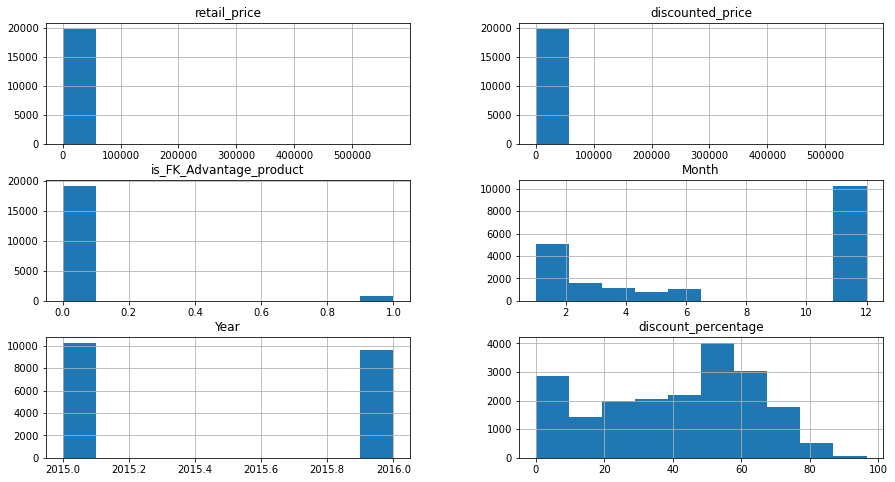

In [27]:
features.hist()
plt.show()

<AxesSubplot:>

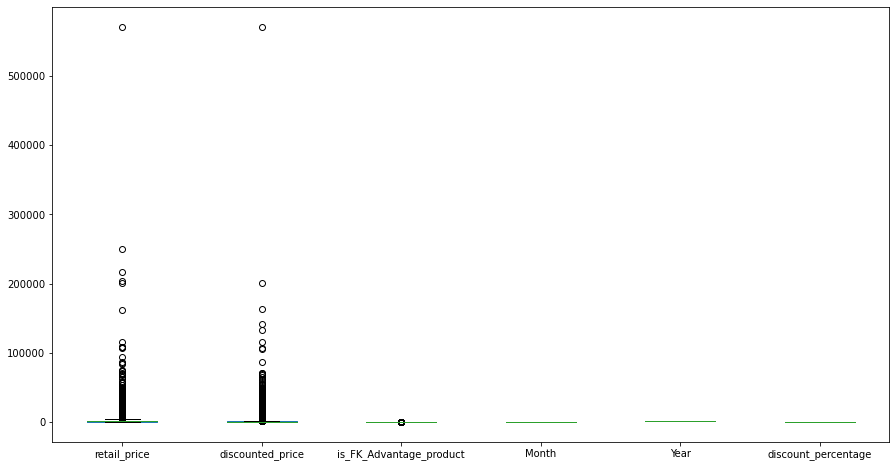

In [28]:
features.plot(kind='box')

array([[<AxesSubplot:title={'center':'retail_price'}>,
        <AxesSubplot:title={'center':'discounted_price'}>],
       [<AxesSubplot:title={'center':'is_FK_Advantage_product'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'discount_percentage'}>]],
      dtype=object)

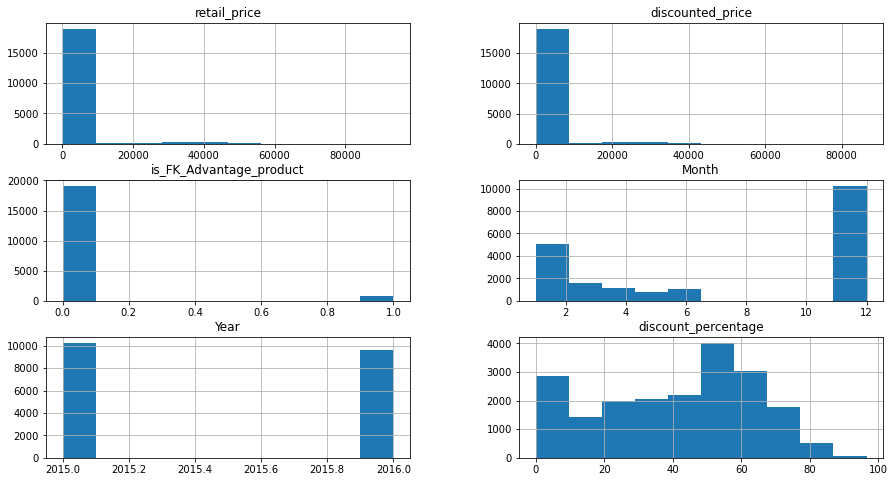

In [29]:
features[features.retail_price<100000].hist()

Q1 = example.quantile(0.25)
Q3 = example.quantile(0.75)

IQR = Q3 - Q1

example = example[~((example < (Q1 - 1.5 * IQR)) | (example > (Q3 + 1.5 * IQR))).any(axis=1)]

example = example.reset_index(drop = True)

In [97]:
plt.rcParams['figure.figsize']=[6,6]

### Buliding a function to run the model 

In [103]:

def model_evaluation(model_name,classifier,X_train,y_train,X_test,y_test):
    
    # traing data 
    model=classifier.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    print('Performance of the model on Training Data:\n')
    print('Confusion matrix:\n')
    print(confusion_matrix(y_train,y_train_pred))
    print()
    print('Classification report:\n')
    print(classification_report(y_train,y_train_pred))
    print()
    #testing data
    y_test_pred=model.predict(X_test)
    print('Performance of the model on testing Data:\n')
    print('Confusion matrix:\n')
    print(confusion_matrix(y_test,y_test_pred))
    print()
    print('Classification report:\n')
    print(classification_report(y_test,y_test_pred))
    print()
    Train_accuracy=model.score(X_train,y_train)
    Test_accuracy=model.score(X_test,y_test)
    print('Training Accuracy:',Train_accuracy)
    print('Testing Accuracy:',Test_accuracy)
    
    tn,fp,fn,tp=confusion_matrix(y_test,y_test_pred).flatten()
    
    plt.figure(figsize=(5,5))
    conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_test_pred),columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
    print()
    print('ROC AUC graph:')
    fpr,tpr,threshold=roc_curve(y_test,y_test_pred)
    area=auc(fpr,tpr)
    plt.figure(figsize=(5,5))
    pl.plot(fpr,tpr,label='Area under curve: {}'.format(round(area,2)))
    pl.plot([0,1],[0,1],'k--')
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.xlim([0,1])
    pl.ylim([0,1])
    plt.legend(loc='lower right')
    plt.show()
    
    global scorecard
    scorecard=scorecard.append({'Model':model_name
                               ,'tn':tn
                               ,'fp':fp
                               ,'fn':fn
                               ,'tp':tp
                               ,'Precision':precision_score(y_test,y_test_pred)
                               ,'Recall':recall_score(y_test,y_test_pred)
                               ,'F1_score':f1_score(y_test,y_test_pred)
                               ,'AUC':roc_auc_score(y_test,y_test_pred)
                               ,'Train_Accuracy':Train_accuracy
                               ,'Test_Accuracy':Test_accuracy
                               ,'Kappa_score':cohen_kappa_score(y_test,y_test_pred)},ignore_index=True
                              )
    
    


In [104]:
scorecard=pd.DataFrame(columns=['Model','tn','fp','fn','tp','Precision','Recall','F1_score','AUC','Train_Accuracy','Test_Accuracy','Kappa_score'])

### Building Models using defined Functions 

In [32]:
# As the Data is highly imbalanced , we are using SMOTE Technique to balanced the data

### Encoding the categorical variables 

In [193]:
X=pd.get_dummies(features.drop(columns=['is_FK_Advantage_product']),drop_first=True)
y=features['is_FK_Advantage_product']

In [34]:
from sklearn.model_selection import train_test_split

### Spliting the data into traning and testing data in 70:30 ratio

In [194]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [36]:
from sklearn.preprocessing import StandardScaler

### Normalising training and testing data seperately

In [195]:
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

### Using SMOTE Technique to balance the Data

In [196]:
smt = SMOTE(random_state = 10)
X_train_smt, y_train_smt = smt.fit_resample(X_train_sc,y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of the model on Training Data:

Confusion matrix:

[[12125  1269]
 [   97 13297]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13394
           1       0.91      0.99      0.95     13394

    accuracy                           0.95     26788
   macro avg       0.95      0.95      0.95     26788
weighted avg       0.95      0.95      0.95     26788


Performance of the model on testing Data:

Confusion matrix:

[[5234  509]
 [  55  174]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5743
           1       0.25      0.76      0.38       229

    accuracy                           0.91      5972
   macro avg       0.62      0.84      0.67      5972
weighted avg       0.96      0.91      0.93      5972


Training Accuracy: 0.9490070180677915
Testing Accuracy: 0.9055592766242465


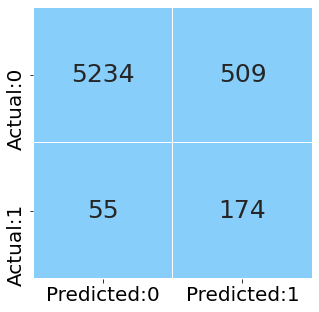


ROC AUC graph:


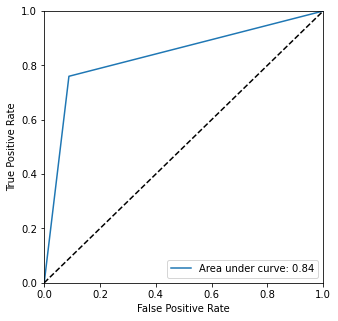

In [105]:
LR=LogisticRegression(random_state=10)
model_evaluation('Logistic',LR,X_train_smt,y_train_smt,X_test_sc,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of the model on Training Data:

Confusion matrix:

[[12125  1269]
 [   97 13297]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13394
           1       0.91      0.99      0.95     13394

    accuracy                           0.95     26788
   macro avg       0.95      0.95      0.95     26788
weighted avg       0.95      0.95      0.95     26788


Performance of the model on testing Data:

Confusion matrix:

[[5234  509]
 [  55  174]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5743
           1       0.25      0.76      0.38       229

    accuracy                           0.91      5972
   macro avg       0.62      0.84      0.67      5972
weighted avg       0.96      0.91      0.93      5972


Training Accuracy: 0.9490070180677915
Testing Accuracy: 0.9055592766242465


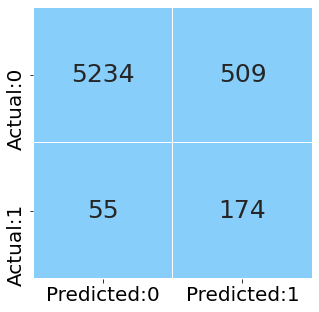


ROC AUC graph:


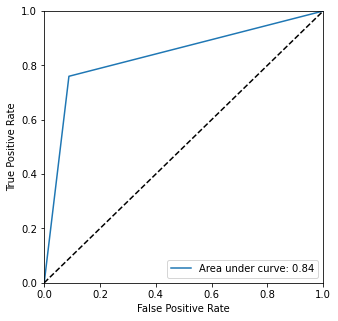

In [157]:
Logistic_balanced=LogisticRegression(random_state=10,class_weight='Balanced')
model_evaluation('Logistic_balanced',Logistic_balanced,X_train_smt,y_train_smt,X_test_sc,y_test)

Performance of the model on Training Data:

Confusion matrix:

[[13383    11]
 [   23 13371]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13394
           1       1.00      1.00      1.00     13394

    accuracy                           1.00     26788
   macro avg       1.00      1.00      1.00     26788
weighted avg       1.00      1.00      1.00     26788


Performance of the model on testing Data:

Confusion matrix:

[[5684   59]
 [  91  138]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5743
           1       0.70      0.60      0.65       229

    accuracy                           0.97      5972
   macro avg       0.84      0.80      0.82      5972
weighted avg       0.97      0.97      0.97      5972


Training Accuracy: 0.9987307749738689
Testing Accuracy: 0.9748827863362358


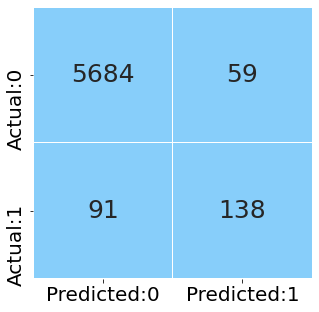


ROC AUC graph:


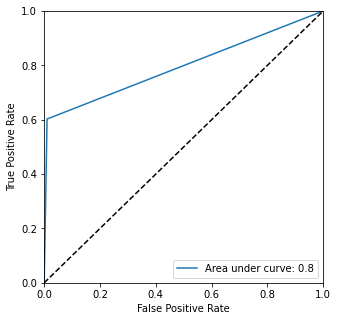

In [106]:
DT=DecisionTreeClassifier(random_state=10)
model_evaluation('DecisionTree',DT,X_train_smt,y_train_smt,X_test_sc,y_test)

Performance of the model on Training Data:

Confusion matrix:

[[13375    19]
 [   15 13379]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13394
           1       1.00      1.00      1.00     13394

    accuracy                           1.00     26788
   macro avg       1.00      1.00      1.00     26788
weighted avg       1.00      1.00      1.00     26788


Performance of the model on testing Data:

Confusion matrix:

[[5696   47]
 [  94  135]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5743
           1       0.74      0.59      0.66       229

    accuracy                           0.98      5972
   macro avg       0.86      0.79      0.82      5972
weighted avg       0.97      0.98      0.98      5972


Training Accuracy: 0.9987307749738689
Testing Accuracy: 0.9763898191560616


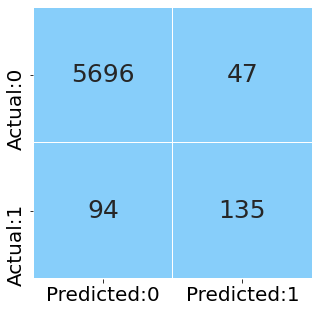


ROC AUC graph:


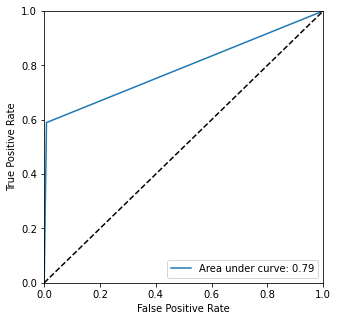

In [107]:
RF=RandomForestClassifier(random_state=10)
model_evaluation('RandomForest',RF,X_train_smt,y_train_smt,X_test_sc,y_test)

Performance of the model on Training Data:

Confusion matrix:

[[11055  2339]
 [  133 13261]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     13394
           1       0.85      0.99      0.91     13394

    accuracy                           0.91     26788
   macro avg       0.92      0.91      0.91     26788
weighted avg       0.92      0.91      0.91     26788


Performance of the model on testing Data:

Confusion matrix:

[[4127 1616]
 [  51  178]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      5743
           1       0.10      0.78      0.18       229

    accuracy                           0.72      5972
   macro avg       0.54      0.75      0.50      5972
weighted avg       0.95      0.72      0.81      5972


Training Accuracy: 0.9077198745707032
Testing Accuracy: 0.7208640321500335


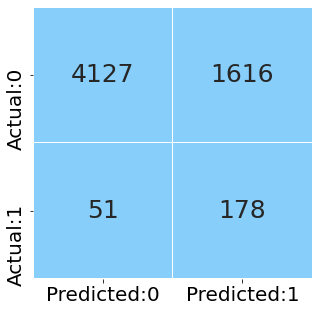


ROC AUC graph:


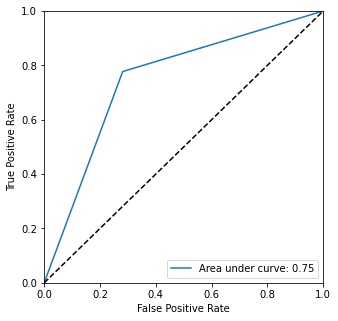

In [108]:
knn=KNeighborsClassifier()
model_evaluation('knn',knn,X_train_smt,y_train_smt,X_test_sc,y_test)

Performance of the model on Training Data:

Confusion matrix:

[[11663  1731]
 [    0 13394]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     13394
           1       0.89      1.00      0.94     13394

    accuracy                           0.94     26788
   macro avg       0.94      0.94      0.94     26788
weighted avg       0.94      0.94      0.94     26788


Performance of the model on testing Data:

Confusion matrix:

[[4169 1574]
 [  23  206]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      5743
           1       0.12      0.90      0.21       229

    accuracy                           0.73      5972
   macro avg       0.56      0.81      0.52      5972
weighted avg       0.96      0.73      0.81      5972


Training Accuracy: 0.9353815141107958
Testing Accuracy: 0.7325853985264568


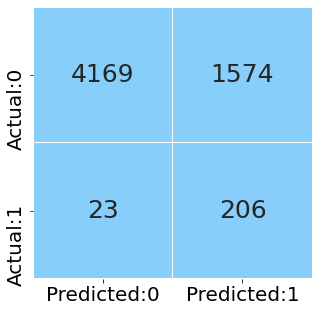


ROC AUC graph:


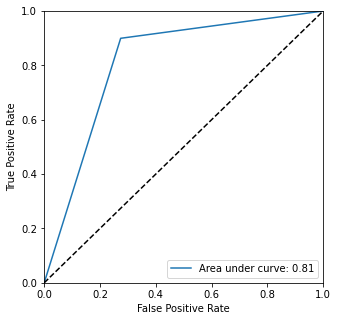

In [110]:
GNB=GaussianNB()
model_evaluation('GNB',GNB,X_train_smt,y_train_smt,X_test_sc,y_test)

In [111]:
scorecard

Model    tn    fp  fn   tp  Precision    Recall  F1_score       AUC  \
0      Logistic  5234   509  55  174   0.254758  0.759825  0.381579  0.835598   
1  DecisionTree  5684    59  91  138   0.700508  0.602620  0.647887  0.796173   
2  RandomForest  5696    47  94  135   0.741758  0.589520  0.656934  0.790668   
3           knn  4127  1616  51  178   0.099220  0.777293  0.175976  0.747953   
4           GNB  4169  1574  23  206   0.115730  0.899563  0.205077  0.812745   

   Train_Accuracy  Test_Accuracy  Kappa_score  
0        0.949007       0.905559     0.343896  
1        0.998731       0.974883     0.634940  
2        0.998731       0.976390     0.644874  
3        0.907720       0.720864     0.115845  
4        0.935382       0.732585     0.147125

In [43]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [86]:
# Hypertuning the random forest model
RF=RandomForestClassifier(random_state=10)
params=[{'n_estimators':[40,50,60,70,80,90,120,150,200],
        'criterion': ['gini','entropy'],
        'min_samples_split':[2,4,6,8],
        'max_depth':[2,4,6,8,10]}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
rf_grid=GridSearchCV(estimator=RF,param_grid=params,cv=kf,scoring='precision')
rf_grid_model=rf_grid.fit(X_train_smt,y_train_smt)
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 8,
 'n_estimators': 120}

In [112]:
RF_tunedp=RandomForestClassifier(criterion='gini',max_depth= 10, min_samples_split= 8, n_estimators= 120,random_state=10)

Performance of the model on Training Data:

Confusion matrix:

[[11739  1655]
 [  868 12526]]

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     13394
           1       0.88      0.94      0.91     13394

    accuracy                           0.91     26788
   macro avg       0.91      0.91      0.91     26788
weighted avg       0.91      0.91      0.91     26788


Performance of the model on testing Data:

Confusion matrix:

[[5036  707]
 [  90  139]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5743
           1       0.16      0.61      0.26       229

    accuracy                           0.87      5972
   macro avg       0.57      0.74      0.59      5972
weighted avg       0.95      0.87      0.90      5972


Training Accuracy: 0.9058160370315066
Testing Accuracy: 0.866543871399866


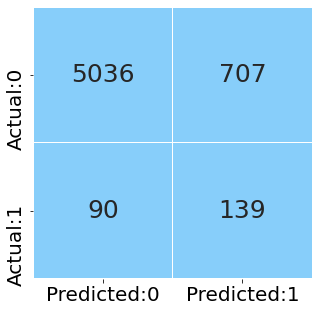


ROC AUC graph:


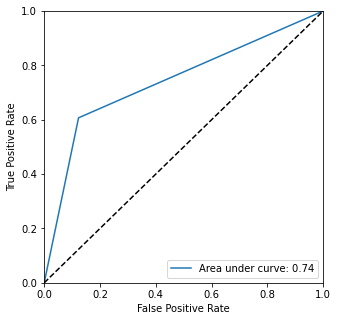

In [113]:
model_evaluation('RF_tunedp',RF_tunedp,X_train_smt,y_train_smt,X_test_sc,y_test)

In [114]:
scorecard

Model    tn    fp  fn   tp  Precision    Recall  F1_score       AUC  \
0      Logistic  5234   509  55  174   0.254758  0.759825  0.381579  0.835598   
1  DecisionTree  5684    59  91  138   0.700508  0.602620  0.647887  0.796173   
2  RandomForest  5696    47  94  135   0.741758  0.589520  0.656934  0.790668   
3           knn  4127  1616  51  178   0.099220  0.777293  0.175976  0.747953   
4           GNB  4169  1574  23  206   0.115730  0.899563  0.205077  0.812745   
5     RF_tunedp  5036   707  90  139   0.164303  0.606987  0.258605  0.741940   

   Train_Accuracy  Test_Accuracy  Kappa_score  
0        0.949007       0.905559     0.343896  
1        0.998731       0.974883     0.634940  
2        0.998731       0.976390     0.644874  
3        0.907720       0.720864     0.115845  
4        0.935382       0.732585     0.147125  
5        0.905816       0.866544     0.210984

In [96]:
# Hypertuning the random forest model
RF=RandomForestClassifier(random_state=10)
params=[{'n_estimators':[90,120,150,180,200],
        'criterion': ['gini','entropy'],
        'min_samples_split':[6,8,10,12,14],
        'max_depth':[8,10,12,14,16]}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
rf_grid=GridSearchCV(estimator=RF,param_grid=params,cv=kf,scoring='precision')
rf_grid_model=rf_grid.fit(X_train_smt,y_train_smt)
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_split': 6,
 'n_estimators': 120}

Performance of the model on Training Data:

Confusion matrix:

[[12440   954]
 [  601 12793]]

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     13394
           1       0.93      0.96      0.94     13394

    accuracy                           0.94     26788
   macro avg       0.94      0.94      0.94     26788
weighted avg       0.94      0.94      0.94     26788


Performance of the model on testing Data:

Confusion matrix:

[[5334  409]
 [ 104  125]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5743
           1       0.23      0.55      0.33       229

    accuracy                           0.91      5972
   macro avg       0.61      0.74      0.64      5972
weighted avg       0.95      0.91      0.93      5972


Training Accuracy: 0.9419516201284157
Testing Accuracy: 0.9140991292699263


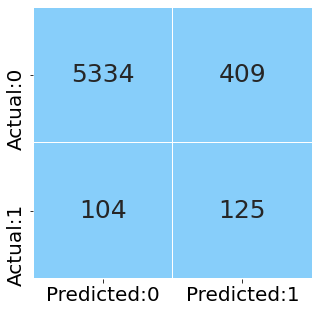


ROC AUC graph:


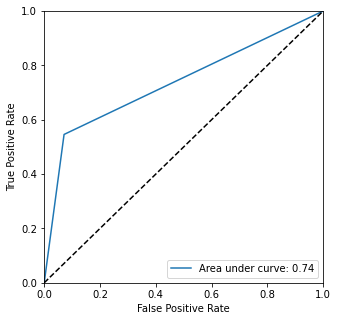

In [115]:
RF_tunedp2=RandomForestClassifier(criterion='gini',max_depth= 16, min_samples_split= 6, n_estimators= 120,random_state=10)
model_evaluation('RF_tunedp2',RF_tunedp2,X_train_smt,y_train_smt,X_test_sc,y_test)

In [116]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0      Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1  DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2  RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3           knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4           GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5     RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6    RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   

        AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0  0.835598        0.949007       0.905559     0.343896  
1  0.796173        0.998731       0.974883     0.634940  
2  0.790668        0.998731       0.976390     0.644874  
3  0.747953        0.907720       0.720864     0.115845  
4  0.812745        0.935382       0.732585     0.147125  
5  0.741940        0.905816       0.866544     0.210984  
6  0.737317        0.941952       0.914099     0.289520

In [173]:
scorecard[scorecard.Model=='RF_tunedp2']

Model    tn   fp   fn   tp  Precision    Recall  F1_score       AUC  \
6  RF_tunedp2  5334  409  104  125   0.234082  0.545852  0.327654  0.737317   

   Train_Accuracy  Test_Accuracy  Kappa_score  
6        0.941952       0.914099      0.28952

In [46]:
# Hypertuning the random forest model
RF=RandomForestClassifier(random_state=10)
params=[{'n_estimators':[90,100,110,120,150,180,200]}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
rf_grid=GridSearchCV(estimator=RF,param_grid=params,cv=kf,scoring='precision')
rf_grid_model=rf_grid.fit(X_train_smt,y_train_smt)
rf_grid_model.best_params_

{'n_estimators': 120}

In [47]:
# Hypertuning the random forest model
RF=RandomForestClassifier(n_estimators=120,random_state=10)
params=[{'criterion': ['gini','entropy']}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
rf_grid=GridSearchCV(estimator=RF,param_grid=params,cv=kf,scoring='precision')
rf_grid_model=rf_grid.fit(X_train_smt,y_train_smt)
rf_grid_model.best_params_

{'criterion': 'gini'}

In [49]:
# Hypertuning the random forest model
RF=RandomForestClassifier(n_estimators=120,criterion='gini',random_state=10)
params=[{'min_samples_split':[2,4,6,8,10,12,14,16]}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
rf_grid=GridSearchCV(estimator=RF,param_grid=params,cv=kf,scoring='precision')
rf_grid_model=rf_grid.fit(X_train_smt,y_train_smt)
rf_grid_model.best_params_

{'min_samples_split': 2}

Performance of the model on Training Data:

Confusion matrix:

[[13375    19]
 [   15 13379]]

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13394
           1       1.00      1.00      1.00     13394

    accuracy                           1.00     26788
   macro avg       1.00      1.00      1.00     26788
weighted avg       1.00      1.00      1.00     26788


Performance of the model on testing Data:

Confusion matrix:

[[5694   49]
 [  93  136]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5743
           1       0.74      0.59      0.66       229

    accuracy                           0.98      5972
   macro avg       0.86      0.79      0.82      5972
weighted avg       0.97      0.98      0.98      5972


Training Accuracy: 0.9987307749738689
Testing Accuracy: 0.9762223710649699


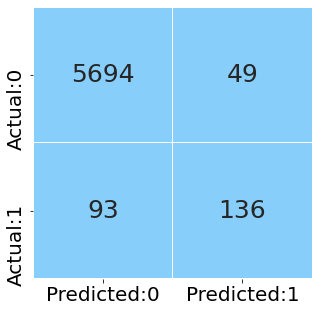


ROC AUC graph:


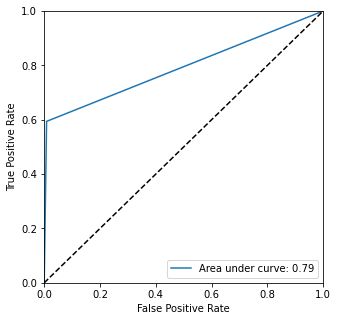

In [117]:
RF_tunedp3=RandomForestClassifier(criterion='gini', min_samples_split= 2, n_estimators= 120,random_state=10)
model_evaluation('RF_tunedp3',RF_tunedp3,X_train_smt,y_train_smt,X_test_sc,y_test)

In [118]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0      Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1  DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2  RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3           knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4           GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5     RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6    RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7    RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   

        AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0  0.835598        0.949007       0.905559     0.343896  
1  0.796173        0.998731       0.974883     0.634940  
2  0.790668        0.998731       0.976390     0.644874  
3  0.747953        0.907720       0.720864     0.115845  
4  0.812745        0.935382       0.732585     0.147125  
5  0.741940        0.905816       0.866544     0.210984  
6  0.737317        0.941952       0.914099     0.289520  
7  0.792677        0.998731       0.976222     0.644833

## Trying to find out Optimum threshold using Youdens technique

In [51]:
RF=RandomForestClassifier(random_state=10)
model=RF.fit(X_train_smt,y_train_smt)
y_test_pred=model.predict(X_test_sc)


In [52]:
model.score(X_train_smt,y_train_smt)

0.9987307749738689

In [53]:
model.score(X_test_sc,y_test)

0.9763898191560616

In [54]:
y_pred_proba=model.predict_proba(X_test_sc)
y_pred_proba[:,1]

array([0.  , 0.05, 0.  , ..., 0.  , 0.  , 0.  ])

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()


TPR       FPR  Threshold  Difference
0  0.772926  0.058158   0.120000    0.714768
1  0.825328  0.110918   0.069231    0.714410
2  0.812227  0.097858   0.075000    0.714369
3  0.812227  0.098032   0.073333    0.714195
4  0.825328  0.111440   0.065000    0.713887

In [77]:
y_test_pred = (RF.predict_proba(X_test_sc)[:,1] >= 0.12).astype(bool)

In [78]:
y_test_pred.astype('int')

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
accuracy_score(y_test,y_test_pred.astype('int'))

0.9353650368385801

In [82]:
y_train_pred = (RF.predict_proba(X_train_smt)[:,1] >= 0.12).astype(bool)

In [83]:
accuracy_score(y_train_smt,y_train_pred.astype('int'))

0.9894728983126774

In [84]:
print(confusion_matrix(y_test,y_test_pred.astype('int')))

[[5409  334]
 [  52  177]]


In [85]:
print(classification_report(y_test,y_test_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      5743
           1       0.35      0.77      0.48       229

    accuracy                           0.94      5972
   macro avg       0.67      0.86      0.72      5972
weighted avg       0.97      0.94      0.95      5972



Performance of the model on Training Data:

Confusion matrix:

[[12265  1129]
 [ 1470 11924]]

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     13394
           1       0.91      0.89      0.90     13394

    accuracy                           0.90     26788
   macro avg       0.90      0.90      0.90     26788
weighted avg       0.90      0.90      0.90     26788


Performance of the model on testing Data:

Confusion matrix:

[[5290  453]
 [  98  131]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5743
           1       0.22      0.57      0.32       229

    accuracy                           0.91      5972
   macro avg       0.60      0.75      0.64      5972
weighted avg       0.95      0.91      0.93      5972


Training Accuracy: 0.9029789457966254
Testing Accuracy: 0.9077361018084393


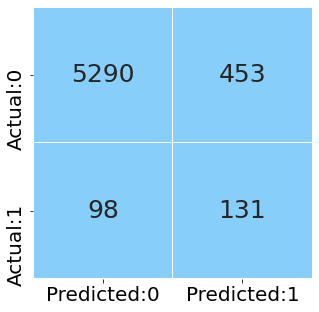


ROC AUC graph:


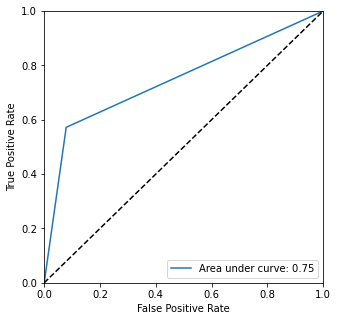

In [120]:
ada=AdaBoostClassifier(random_state=10)
model_evaluation('AdaBoost',ada,X_train_smt,y_train_smt,X_test_sc,y_test)

Performance of the model on Training Data:

Confusion matrix:

[[12593   801]
 [ 1321 12073]]

Classification report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     13394
           1       0.94      0.90      0.92     13394

    accuracy                           0.92     26788
   macro avg       0.92      0.92      0.92     26788
weighted avg       0.92      0.92      0.92     26788


Performance of the model on testing Data:

Confusion matrix:

[[5421  322]
 [ 111  118]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5743
           1       0.27      0.52      0.35       229

    accuracy                           0.93      5972
   macro avg       0.62      0.73      0.66      5972
weighted avg       0.95      0.93      0.94      5972


Training Accuracy: 0.9207854263102881
Testing Accuracy: 0.9274949765572672


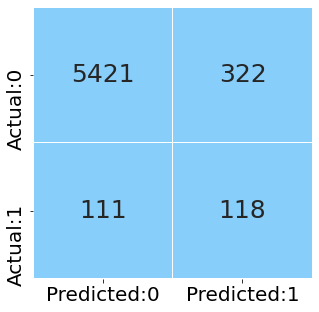


ROC AUC graph:


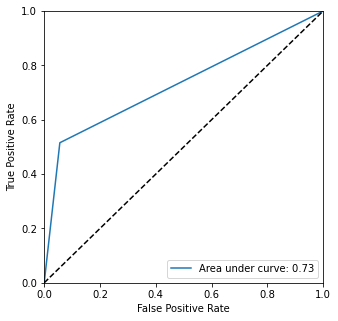

In [121]:
GB=GradientBoostingClassifier(random_state=10)
model_evaluation('GB',GB,X_train_smt,y_train_smt,X_test_sc,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Performance of the model on Training Data:

Confusion matrix:

[[13189   205]
 [  206 13188]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13394
           1       0.98      0.98      0.98     13394

    accuracy                           0.98     26788
   macro avg       0.98      0.98      0.98     26788
weighted avg       0.98      0.98      0.98     26788


Performance of the model on testing Data:

Confusion matrix:

[[5633  110]
 [  95  134]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5743
           1       0

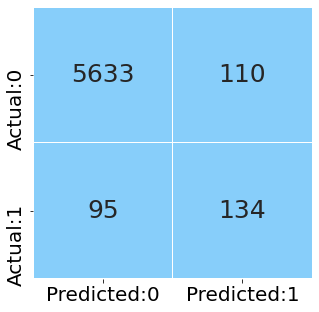


ROC AUC graph:


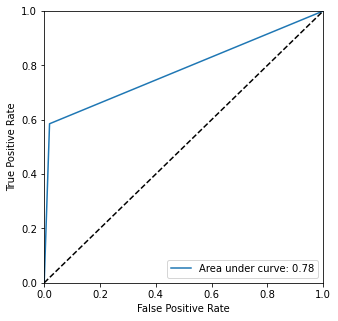

In [122]:
XGB=XGBClassifier(random_state=10)
model_evaluation('XGB',XGB,X_train_smt,y_train_smt,X_test_sc,y_test)

In [123]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0       Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1   DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2   RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3            knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4            GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5      RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6     RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7     RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   
8       AdaBoost  5290   453   98  131   0.224315  0.572052  0.322263   
9             GB  5421   322  111  118   0.268182  0.515284  0.352765   
10           XGB  5633   110   95  134   0.549180  0.585153  0.566596   

         AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0   0.835598        0.949007       0.905559     0.343896  
1   0.796173        0.998731       0.974883     0.634940  
2   0.790668        0.998731       0.976390     0.644874  
3   0.747953        0.907720       0.720864     0.115845  
4   0.812745        0.935382       0.732585     0.147125  
5   0.741940        0.905816       0.866544     0.210984  
6   0.737317        0.941952       0.914099     0.289520  
7   0.792677        0.998731       0.976222     0.644833  
8   0.746587        0.902979       0.907736     0.282750  
9   0.729608        0.920785       0.927495     0.318385  
10  0.783000        0.984657       0.965673     0.548744

In [128]:
# Hypertuning the random forest model
RF=RandomForestClassifier(random_state=10)
params=[{'max_depth':range(2,44,2)}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
rf_grid=GridSearchCV(estimator=RF,param_grid=params,cv=kf,scoring='precision')
rf_grid_model=rf_grid.fit(X_train_smt,y_train_smt)
rf_grid_model.best_params_

{'max_depth': 42}

Performance of the model on Training Data:

Confusion matrix:

[[13033   361]
 [  131 13263]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     13394
           1       0.97      0.99      0.98     13394

    accuracy                           0.98     26788
   macro avg       0.98      0.98      0.98     26788
weighted avg       0.98      0.98      0.98     26788


Performance of the model on testing Data:

Confusion matrix:

[[5516  227]
 [  96  133]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5743
           1       0.37      0.58      0.45       229

    accuracy                           0.95      5972
   macro avg       0.68      0.77      0.71      5972
weighted avg       0.96      0.95      0.95      5972


Training Accuracy: 0.9816335672689264
Testing Accuracy: 0.945914266577361


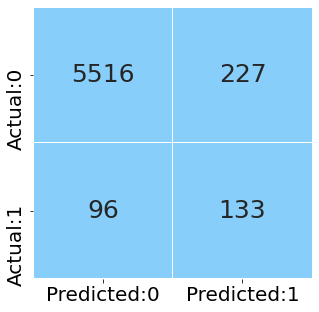


ROC AUC graph:


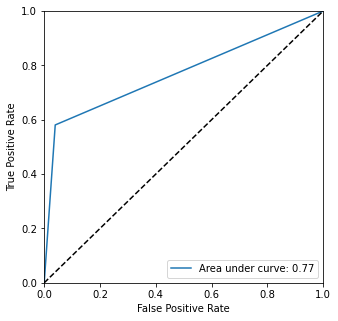

In [133]:
RF42=RandomForestClassifier(n_estimators=120,max_depth=42,random_state=10)
model_evaluation('RF42',RF42,X_train_smt,y_train_smt,X_test_sc,y_test)

In [134]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0       Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1   DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2   RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3            knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4            GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5      RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6     RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7     RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   
8       AdaBoost  5290   453   98  131   0.224315  0.572052  0.322263   
9             GB  5421   322  111  118   0.268182  0.515284  0.352765   
10           XGB  5633   110   95  134   0.549180  0.585153  0.566596   
11          RF42  5696    47   94  135   0.741758  0.589520  0.656934   
12          RF42  5516   227   96  133   0.369444  0.580786  0.451613   

         AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0   0.835598        0.949007       0.905559     0.343896  
1   0.796173        0.998731       0.974883     0.634940  
2   0.790668        0.998731       0.976390     0.644874  
3   0.747953        0.907720       0.720864     0.115845  
4   0.812745        0.935382       0.732585     0.147125  
5   0.741940        0.905816       0.866544     0.210984  
6   0.737317        0.941952       0.914099     0.289520  
7   0.792677        0.998731       0.976222     0.644833  
8   0.746587        0.902979       0.907736     0.282750  
9   0.729608        0.920785       0.927495     0.318385  
10  0.783000        0.984657       0.965673     0.548744  
11  0.790668        0.998731       0.976390     0.644874  
12  0.770630        0.981634       0.945914     0.424644

In [176]:
scorecard.iloc[[8,9,10]]

Model    tn   fp   fn   tp  Precision    Recall  F1_score       AUC  \
8   AdaBoost  5290  453   98  131   0.224315  0.572052  0.322263  0.746587   
9         GB  5421  322  111  118   0.268182  0.515284  0.352765  0.729608   
10       XGB  5633  110   95  134   0.549180  0.585153  0.566596  0.783000   

    Train_Accuracy  Test_Accuracy  Kappa_score  
8         0.902979       0.907736     0.282750  
9         0.920785       0.927495     0.318385  
10        0.984657       0.965673     0.548744

In [140]:
# Hypertuning the random forest model
RF=RandomForestClassifier(n_estimators=120,random_state=10)
params=[{'max_depth':range(1,100,5),
        'min_samples_leaf':[2,4,6]}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
rf_grid=GridSearchCV(estimator=RF,param_grid=params,cv=kf,scoring='precision')
rf_grid_model=rf_grid.fit(X_train_smt,y_train_smt)
rf_grid_model.best_params_

{'max_depth': 96, 'min_samples_leaf': 2}

Performance of the model on Training Data:

Confusion matrix:

[[12894   500]
 [  260 13134]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     13394
           1       0.96      0.98      0.97     13394

    accuracy                           0.97     26788
   macro avg       0.97      0.97      0.97     26788
weighted avg       0.97      0.97      0.97     26788


Performance of the model on testing Data:

Confusion matrix:

[[5474  269]
 [  96  133]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5743
           1       0.33      0.58      0.42       229

    accuracy                           0.94      5972
   macro avg       0.66      0.77      0.69      5972
weighted avg       0.96      0.94      0.95      5972


Training Accuracy: 0.971629087651187
Testing Accuracy: 0.9388814467515071


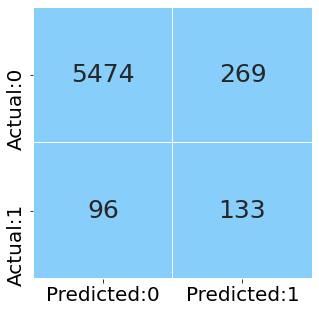


ROC AUC graph:


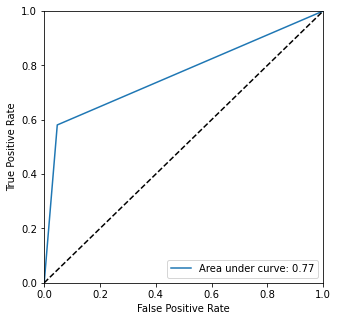

In [141]:
RF96_2=RandomForestClassifier(n_estimators=120,max_depth=96,min_samples_leaf=2,random_state=10)
model_evaluation('RF96_2',RF96_2,X_train_smt,y_train_smt,X_test_sc,y_test)

In [142]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0       Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1   DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2   RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3            knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4            GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5      RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6     RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7     RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   
8       AdaBoost  5290   453   98  131   0.224315  0.572052  0.322263   
9             GB  5421   322  111  118   0.268182  0.515284  0.352765   
10           XGB  5633   110   95  134   0.549180  0.585153  0.566596   
11          RF42  5696    47   94  135   0.741758  0.589520  0.656934   
12          RF42  5516   227   96  133   0.369444  0.580786  0.451613   
13        RF96_2  5474   269   96  133   0.330846  0.580786  0.421553   

         AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0   0.835598        0.949007       0.905559     0.343896  
1   0.796173        0.998731       0.974883     0.634940  
2   0.790668        0.998731       0.976390     0.644874  
3   0.747953        0.907720       0.720864     0.115845  
4   0.812745        0.935382       0.732585     0.147125  
5   0.741940        0.905816       0.866544     0.210984  
6   0.737317        0.941952       0.914099     0.289520  
7   0.792677        0.998731       0.976222     0.644833  
8   0.746587        0.902979       0.907736     0.282750  
9   0.729608        0.920785       0.927495     0.318385  
10  0.783000        0.984657       0.965673     0.548744  
11  0.790668        0.998731       0.976390     0.644874  
12  0.770630        0.981634       0.945914     0.424644  
13  0.766973        0.971629       0.938881     0.391839

Performance of the model on Training Data:

Confusion matrix:

[[12926   468]
 [  260 13134]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     13394
           1       0.97      0.98      0.97     13394

    accuracy                           0.97     26788
   macro avg       0.97      0.97      0.97     26788
weighted avg       0.97      0.97      0.97     26788


Performance of the model on testing Data:

Confusion matrix:

[[5494  249]
 [  96  133]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5743
           1       0.35      0.58      0.44       229

    accuracy                           0.94      5972
   macro avg       0.67      0.77      0.70      5972
weighted avg       0.96      0.94      0.95      5972


Training Accuracy: 0.9728236523816635
Testing Accuracy: 0.9422304085733423


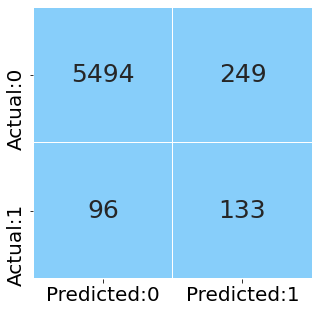


ROC AUC graph:


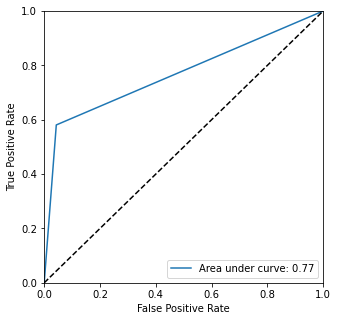

In [143]:
RF0_2=RandomForestClassifier(n_estimators=120,min_samples_leaf=2,random_state=10)
model_evaluation('RF0_2',RF0_2,X_train_smt,y_train_smt,X_test_sc,y_test)

In [144]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0       Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1   DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2   RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3            knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4            GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5      RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6     RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7     RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   
8       AdaBoost  5290   453   98  131   0.224315  0.572052  0.322263   
9             GB  5421   322  111  118   0.268182  0.515284  0.352765   
10           XGB  5633   110   95  134   0.549180  0.585153  0.566596   
11          RF42  5696    47   94  135   0.741758  0.589520  0.656934   
12          RF42  5516   227   96  133   0.369444  0.580786  0.451613   
13        RF96_2  5474   269   96  133   0.330846  0.580786  0.421553   
14         RF0_2  5494   249   96  133   0.348168  0.580786  0.435352   

         AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0   0.835598        0.949007       0.905559     0.343896  
1   0.796173        0.998731       0.974883     0.634940  
2   0.790668        0.998731       0.976390     0.644874  
3   0.747953        0.907720       0.720864     0.115845  
4   0.812745        0.935382       0.732585     0.147125  
5   0.741940        0.905816       0.866544     0.210984  
6   0.737317        0.941952       0.914099     0.289520  
7   0.792677        0.998731       0.976222     0.644833  
8   0.746587        0.902979       0.907736     0.282750  
9   0.729608        0.920785       0.927495     0.318385  
10  0.783000        0.984657       0.965673     0.548744  
11  0.790668        0.998731       0.976390     0.644874  
12  0.770630        0.981634       0.945914     0.424644  
13  0.766973        0.971629       0.938881     0.391839  
14  0.768714        0.972824       0.942230     0.406915

Performance of the model on Training Data:

Confusion matrix:

[[12310  1084]
 [  957 12437]]

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     13394
           1       0.92      0.93      0.92     13394

    accuracy                           0.92     26788
   macro avg       0.92      0.92      0.92     26788
weighted avg       0.92      0.92      0.92     26788


Performance of the model on testing Data:

Confusion matrix:

[[5327  416]
 [  67  162]]

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5743
           1       0.28      0.71      0.40       229

    accuracy                           0.92      5972
   macro avg       0.63      0.82      0.68      5972
weighted avg       0.96      0.92      0.94      5972


Training Accuracy: 0.9238091682843064
Testing Accuracy: 0.9191225720026792


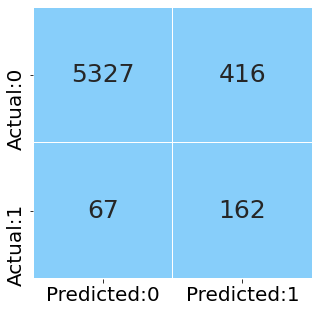


ROC AUC graph:


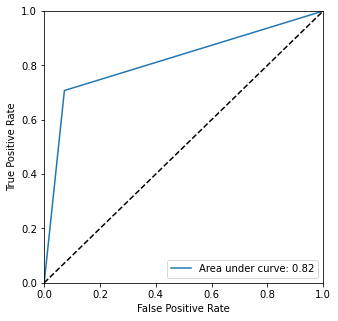

In [146]:
sgd=SGDClassifier(random_state=10)
model_evaluation('sgd',sgd,X_train_smt,y_train_smt,X_test_sc,y_test)

In [150]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0       Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1   DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2   RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3            knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4            GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5      RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6     RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7     RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   
8       AdaBoost  5290   453   98  131   0.224315  0.572052  0.322263   
9             GB  5421   322  111  118   0.268182  0.515284  0.352765   
10           XGB  5633   110   95  134   0.549180  0.585153  0.566596   
11          RF42  5696    47   94  135   0.741758  0.589520  0.656934   
12          RF42  5516   227   96  133   0.369444  0.580786  0.451613   
13        RF96_2  5474   269   96  133   0.330846  0.580786  0.421553   
14         RF0_2  5494   249   96  133   0.348168  0.580786  0.435352   
15           sgd  5327   416   67  162   0.280277  0.707424  0.401487   

         AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0   0.835598        0.949007       0.905559     0.343896  
1   0.796173        0.998731       0.974883     0.634940  
2   0.790668        0.998731       0.976390     0.644874  
3   0.747953        0.907720       0.720864     0.115845  
4   0.812745        0.935382       0.732585     0.147125  
5   0.741940        0.905816       0.866544     0.210984  
6   0.737317        0.941952       0.914099     0.289520  
7   0.792677        0.998731       0.976222     0.644833  
8   0.746587        0.902979       0.907736     0.282750  
9   0.729608        0.920785       0.927495     0.318385  
10  0.783000        0.984657       0.965673     0.548744  
11  0.790668        0.998731       0.976390     0.644874  
12  0.770630        0.981634       0.945914     0.424644  
13  0.766973        0.971629       0.938881     0.391839  
14  0.768714        0.972824       0.942230     0.406915  
15  0.817494        0.923809       0.919123     0.366701

In [159]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = KFold(n_splits=5,shuffle=True,random_state=10)

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", 
                               random_state = 10)

# fit tree on training data
tree = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train_smt, y_train_smt)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [160]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.699988      0.115234         0.155192        0.008821   
1       2.198155      0.064295         0.154291        0.012703   
2       2.880199      0.138715         0.172132        0.008161   
3       3.337992      0.113712         0.163386        0.015300   
4       3.804054      0.065192         0.156958        0.006172   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.784808           0.801232   
1               2  {'max_depth': 2}           0.860582           0.818029   
2               3  {'max_depth': 3}           0.819149           0.821575   
3               4  {'max_depth': 4}           0.820829           0.826988   
4               5  {'max_depth': 5}           0.841172           0.834080   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.782195           0.848049  ...         0.788786        0.038638   
1           0.803285           0.848609  ...         0.835935        0.021587   
2           0.838932           0.864476  ...         0.840042        0.018072   
3           0.842292           0.857756  ...         0.843775        0.018696   
4           0.851437           0.878477  ...         0.856056        0.017843   

   rank_test_score  split0_train_score  split1_train_score  \
0               39            0.785441            0.812459   
1               38            0.854270            0.823098   
2               37            0.816286            0.827252   
3               36            0.821652            0.832991   
4               35            0.844097            0.844657   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.783294            0.854603            0.727124   
1            0.809753            0.857449            0.843591   
2            0.846990            0.865615            0.854323   
3            0.851750            0.861836            0.866782   
4            0.860756            0.880874            0.868368   

   mean_train_score  std_train_score  
0          0.792584         0.041626  
1          0.837632         0.018404  
2          0.842093         0.017962  
3          0.847002         0.017162  
4          0.859750         0.014102  

[5 rows x 21 columns]

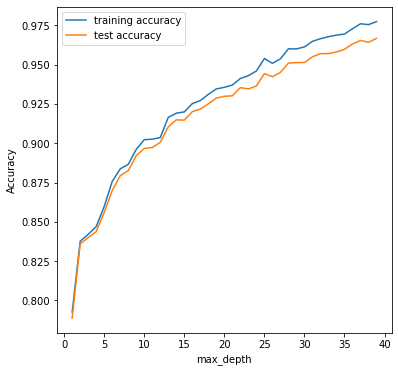

In [161]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

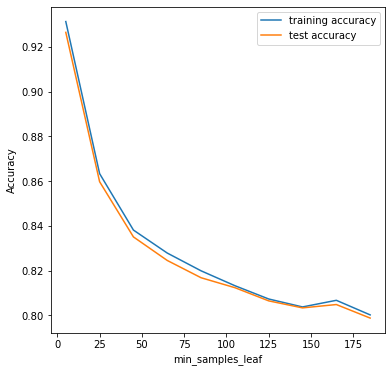

In [162]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = KFold(n_splits=5,shuffle=True,random_state=10)

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", 
                               random_state = 10)

# fit tree on training data
tree = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train_smt, y_train_smt)

# scores of GridSearch CV
scores = tree.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


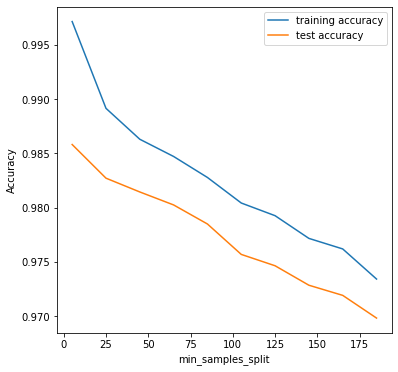

In [163]:

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = KFold(n_splits=5,shuffle=True,random_state=10)

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", 
                               random_state = 10)

# fit tree on training data
tree = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train_smt, y_train_smt)



# scores of GridSearch CV
scores = tree.cv_results_


# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


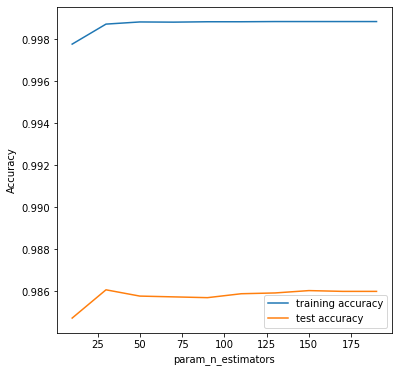

In [164]:

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = KFold(n_splits=5,shuffle=True,random_state=10)

# parameters to build the model on
parameters = {'n_estimators': range(10, 201, 20)}

# instantiate the model
rf = RandomForestClassifier(criterion = "gini", 
                               random_state = 10)

# fit tree on training data
tree = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train_smt, y_train_smt)



# scores of GridSearch CV
scores = tree.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("param_n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [166]:

# Create the parameter grid 
param_grid = {
    'max_depth': [12,14],
    'min_samples_leaf': range(100, 175, 25),
    'min_samples_split':range(175,275,25),
    'n_estimators':[25,28]
    
}

n_folds = KFold(n_splits=5,shuffle=True,random_state=10)

# Instantiate the grid search model
rf = RandomForestClassifier(random_state=10)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           return_train_score=True,
                          cv = n_folds, verbose = 1,scoring='precision')

# Fit the grid search to the data
grid_search.fit(X_train_smt,y_train_smt)

# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
best accuracy 0.7149716758075731
RandomForestClassifier(max_depth=12, min_samples_leaf=100,
                       min_samples_split=175, n_estimators=28, random_state=10)


Performance of the model on Training Data:

Confusion matrix:

[[ 9015  4379]
 [ 1992 11402]]

Classification report:

              precision    recall  f1-score   support

           0       0.82      0.67      0.74     13394
           1       0.72      0.85      0.78     13394

    accuracy                           0.76     26788
   macro avg       0.77      0.76      0.76     26788
weighted avg       0.77      0.76      0.76     26788


Performance of the model on testing Data:

Confusion matrix:

[[3925 1818]
 [  66  163]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.68      0.81      5743
           1       0.08      0.71      0.15       229

    accuracy                           0.68      5972
   macro avg       0.53      0.70      0.48      5972
weighted avg       0.95      0.68      0.78      5972


Training Accuracy: 0.7621696281917276
Testing Accuracy: 0.6845277963831212


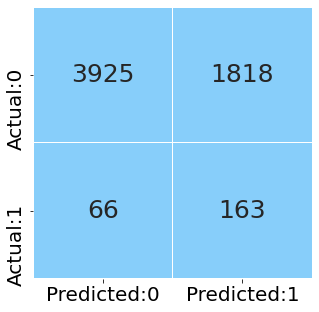


ROC AUC graph:


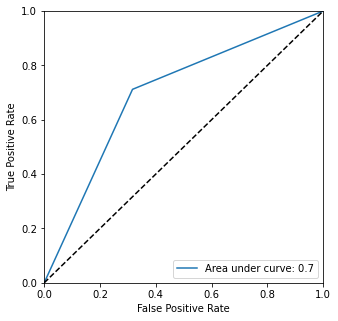

In [169]:
RF_f=RandomForestClassifier(max_depth=None, min_samples_leaf=100,
                       min_samples_split=175, n_estimators=28, random_state=10)
model_evaluation('RF_f',RF_f,X_train_smt,y_train_smt,X_test_sc,y_test)

In [170]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0            Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1        DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2        RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3                 knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4                 GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5           RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6          RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7          RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   
8            AdaBoost  5290   453   98  131   0.224315  0.572052  0.322263   
9                  GB  5421   322  111  118   0.268182  0.515284  0.352765   
10                XGB  5633   110   95  134   0.549180  0.585153  0.566596   
11               RF42  5696    47   94  135   0.741758  0.589520  0.656934   
12               RF42  5516   227   96  133   0.369444  0.580786  0.451613   
13             RF96_2  5474   269   96  133   0.330846  0.580786  0.421553   
14              RF0_2  5494   249   96  133   0.348168  0.580786  0.435352   
15                sgd  5327   416   67  162   0.280277  0.707424  0.401487   
16  Logistic_balanced  5234   509   55  174   0.254758  0.759825  0.381579   
17  Logistic_balanced  5234   509   55  174   0.254758  0.759825  0.381579   
18               RF_f  3925  1818   66  163   0.082282  0.711790  0.147511   
19               RF_f  3925  1818   66  163   0.082282  0.711790  0.147511   

         AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0   0.835598        0.949007       0.905559     0.343896  
1   0.796173        0.998731       0.974883     0.634940  
2   0.790668        0.998731       0.976390     0.644874  
3   0.747953        0.907720       0.720864     0.115845  
4   0.812745        0.935382       0.732585     0.147125  
5   0.741940        0.905816       0.866544     0.210984  
6   0.737317        0.941952       0.914099     0.289520  
7   0.792677        0.998731       0.976222     0.644833  
8   0.746587        0.902979       0.907736     0.282750  
9   0.729608        0.920785       0.927495     0.318385  
10  0.783000        0.984657       0.965673     0.548744  
11  0.790668        0.998731       0.976390     0.644874  
12  0.770630        0.981634       0.945914     0.424644  
13  0.766973        0.971629       0.938881     0.391839  
14  0.768714        0.972824       0.942230     0.406915  
15  0.817494        0.923809       0.919123     0.366701  
16  0.835598        0.949007       0.905559     0.343896  
17  0.835598        0.949007       0.905559     0.343896  
18  0.697616        0.762170       0.684528     0.084581  
19  0.697616        0.762170       0.684528     0.084581

In [171]:
# Hypertuning the random forest model
GB=GradientBoostingClassifier(random_state=10)
params=[{
        'learning_rate' : [0.1, 0.01, 0.001, 0.15, 0.015], 
        'max_depth' : [2, 3, 4, 5, 6],
        'min_samples_split':[2,4,6]}]

kf=KFold(n_splits=3,random_state=10,shuffle=True)
gb_grid=GridSearchCV(estimator=GB,param_grid=params,cv=kf,scoring='precision')
gb_grid_model=gb_grid.fit(X_train_smt,y_train_smt)
gb_grid_model.best_params_

KeyboardInterrupt: 

Performance of the model on Training Data:

Confusion matrix:

[[12926   468]
 [  260 13134]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     13394
           1       0.97      0.98      0.97     13394

    accuracy                           0.97     26788
   macro avg       0.97      0.97      0.97     26788
weighted avg       0.97      0.97      0.97     26788


Performance of the model on testing Data:

Confusion matrix:

[[5494  249]
 [  96  133]]

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5743
           1       0.35      0.58      0.44       229

    accuracy                           0.94      5972
   macro avg       0.67      0.77      0.70      5972
weighted avg       0.96      0.94      0.95      5972


Training Accuracy: 0.9728236523816635
Testing Accuracy: 0.9422304085733423


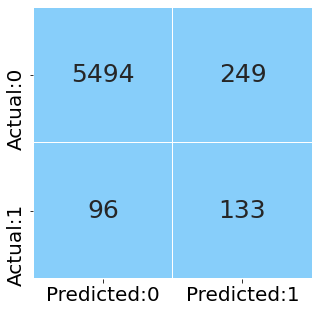


ROC AUC graph:


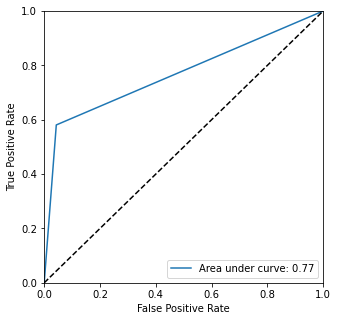

In [178]:
RFmax5=RandomForestClassifier(max_features=5,random_state=10)
model_evaluation('RF0_2',RF0_2,X_train_smt,y_train_smt,X_test_sc,y_test)

In [179]:
scorecard

Model    tn    fp   fn   tp  Precision    Recall  F1_score  \
0            Logistic  5234   509   55  174   0.254758  0.759825  0.381579   
1        DecisionTree  5684    59   91  138   0.700508  0.602620  0.647887   
2        RandomForest  5696    47   94  135   0.741758  0.589520  0.656934   
3                 knn  4127  1616   51  178   0.099220  0.777293  0.175976   
4                 GNB  4169  1574   23  206   0.115730  0.899563  0.205077   
5           RF_tunedp  5036   707   90  139   0.164303  0.606987  0.258605   
6          RF_tunedp2  5334   409  104  125   0.234082  0.545852  0.327654   
7          RF_tunedp3  5694    49   93  136   0.735135  0.593886  0.657005   
8            AdaBoost  5290   453   98  131   0.224315  0.572052  0.322263   
9                  GB  5421   322  111  118   0.268182  0.515284  0.352765   
10                XGB  5633   110   95  134   0.549180  0.585153  0.566596   
11               RF42  5696    47   94  135   0.741758  0.589520  0.656934   
12               RF42  5516   227   96  133   0.369444  0.580786  0.451613   
13             RF96_2  5474   269   96  133   0.330846  0.580786  0.421553   
14              RF0_2  5494   249   96  133   0.348168  0.580786  0.435352   
15                sgd  5327   416   67  162   0.280277  0.707424  0.401487   
16  Logistic_balanced  5234   509   55  174   0.254758  0.759825  0.381579   
17  Logistic_balanced  5234   509   55  174   0.254758  0.759825  0.381579   
18               RF_f  3925  1818   66  163   0.082282  0.711790  0.147511   
19               RF_f  3925  1818   66  163   0.082282  0.711790  0.147511   
20              RF0_2  5494   249   96  133   0.348168  0.580786  0.435352   

         AUC  Train_Accuracy  Test_Accuracy  Kappa_score  
0   0.835598        0.949007       0.905559     0.343896  
1   0.796173        0.998731       0.974883     0.634940  
2   0.790668        0.998731       0.976390     0.644874  
3   0.747953        0.907720       0.720864     0.115845  
4   0.812745        0.935382       0.732585     0.147125  
5   0.741940        0.905816       0.866544     0.210984  
6   0.737317        0.941952       0.914099     0.289520  
7   0.792677        0.998731       0.976222     0.644833  
8   0.746587        0.902979       0.907736     0.282750  
9   0.729608        0.920785       0.927495     0.318385  
10  0.783000        0.984657       0.965673     0.548744  
11  0.790668        0.998731       0.976390     0.644874  
12  0.770630        0.981634       0.945914     0.424644  
13  0.766973        0.971629       0.938881     0.391839  
14  0.768714        0.972824       0.942230     0.406915  
15  0.817494        0.923809       0.919123     0.366701  
16  0.835598        0.949007       0.905559     0.343896  
17  0.835598        0.949007       0.905559     0.343896  
18  0.697616        0.762170       0.684528     0.084581  
19  0.697616        0.762170       0.684528     0.084581  
20  0.768714        0.972824       0.942230     0.406915

In [197]:
RF_final=RandomForestClassifier(random_state=10)
model=RF_final.fit(X_train_smt,y_train_smt)
    

In [ ]:
model.feature_importances_

In [200]:
feat_imp=pd.DataFrame(model.feature_importances_,index=X.columns,columns=['Importance'])
feat_imp=feat_imp.reset_index().sort_values('Importance',ascending=False)


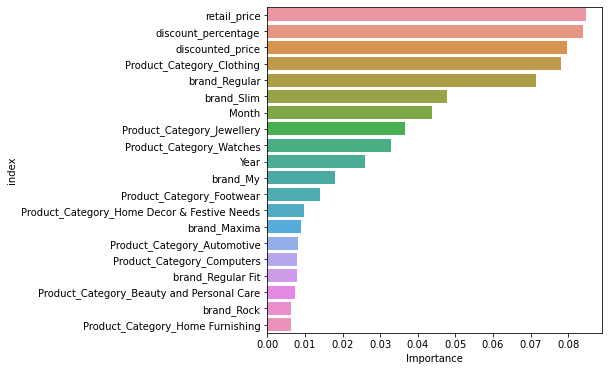

In [202]:
sns.barplot(data=feat_imp.head(20),x='Importance',y='index')
plt.show()